In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly

from tqdm import tqdm

from utils import lla2enu, enu2lla, curvature

plt.style.use('seaborn-whitegrid')

In [43]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

ModuleNotFoundError: No module named 'cartopy'

In [38]:
fdate = "2019-04-02"
file_path = f'data/train_data15/{fdate}_track_data_15.csv.gz'
file_path_vir_wp = f'data/train_data15_VIR_WP/{fdate}_track_data_15.csv.gz'

In [39]:
def plot_trajectory(df: pd.DataFrame, df2, title=''):
    fig, (ax, ax2) = plt.subplots(1, 2, figsize=(15, 7))
    ax.set(title=title, xlabel='Longitude', ylabel='Latitude')
    ax.plot(df['lon'].values, df['lat'].values, 'b-')
    
    wps = df[['wp_lon', 'wp_lat', 'ident']].drop_duplicates(ignore_index=True)
    ax.plot(wps['wp_lon'].values, wps['wp_lat'].values, 'k^')
    ax.axis('equal')
    
    
    ax2.set(title=title, xlabel='Longitude', ylabel='Latitude')
    ax2.plot(df2['lon'].values, df2['lat'].values, 'b-')
    
    wps = df2[['wp_lon', 'wp_lat', 'ident']].drop_duplicates(ignore_index=True)
    idx = wps.ident.str.contains('VIR_WP_')
    wps1 = wps[~idx]
    wps2 = wps[idx]
    ax2.plot(wps1['wp_lon'].values, wps1['wp_lat'].values, 'k^')
    ax2.plot(wps2['wp_lon'].values, wps2['wp_lat'].values, 'r^')
    ax2.axis('equal')
    
#     for ident, lon, lat in zip(wps['ident'].values, wps['wp_lon'].values, wps['wp_lat'].values):
#         ax.annotate(ident, (lon, lat))
    
#     plt.axis('square')
    return fig
    

In [40]:
df = pd.read_csv(file_path)
gps = df.groupby('flight_id')

df2  = pd.read_csv(file_path_vir_wp)
gps2 = df2.groupby('flight_id')

100%|██████████| 52/52 [00:00<00:00, 352.28it/s]


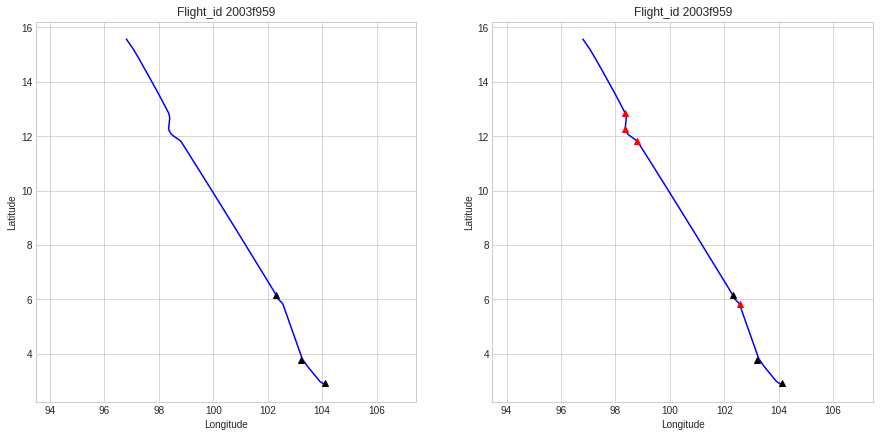

In [42]:
# 2003f959
for i, (fid, df) in enumerate(tqdm(gps)):
    if fid != '2003f959': continue
    if fid in gps2.groups:
        df2 = gps2.get_group(fid)
    else:
        continue
    fig = plot_trajectory(df, df2, f'Flight_id {fid}')
    fig.savefig(f'images/trajectory/{fdate}_{fid}.eps')
    if (i+1) % 10 == 0: plt.close('all')

In [13]:
'1fd09492' in gps.groups

True

In [11]:
df['flight_id'].unique()

array(['1fd09492', '1fd0b40c', '1fd0f035', '1fd1183d', '1fd1282a',
       '1fd128d1', '1fd13806', '1fd139a5', '1fd13a37', '1fd14321',
       '1fd14cea', '1fd15c9d', '1fd1626d', '1fd16fb1', '1fd17757',
       '1fd17791', '1fd178c6', '1fd17b3a', '1fd180eb', '1fd18756',
       '1fd188e9', '1fd189c2', '1fd191cb', '1fd192cb', '1fd192ed',
       '1fd19d83', '1fd1a557', '1fd1a795', '1fd1ab6f', '1fd1c421',
       '1fd1c738', '1fd1d83f', '1fd1e0fc', '1fd1e4da', '1fd1f2ab',
       '1fd20530', '1fd209e3', '1fd20ee0', '1fd2113a', '1fd21613',
       '1fd21bd5', '1fd236fc', '1fd23793', '1fd23be3', '1fd2c502',
       '1fd2c80e', '1fd2dbcf', '1fd2e590', '1fd31570', '1fd31cc8',
       '1fd32572', '1fd33010', '1fd33011', '1fd34b88'], dtype=object)

In [28]:
flight_df = gps.get_group('1fd191cb').reset_index(drop=True)
# flight_df = gps.get_group('1fd1183d')

In [29]:
flight_df.head()

flight_id   timestamp       lat        lon           alt  curvature  ident  \
0  1fd191cb  1552721115  8.323990  92.607873  34974.670759   0.000613  IGOGU   
1  1fd191cb  1552721130  8.311148  92.637358  34971.292020   0.000871  IGOGU   
2  1fd191cb  1552721145  8.298257  92.666759  34970.524284   0.001031  IGOGU   
3  1fd191cb  1552721160  8.285330  92.696078  34971.912095   0.000832  IGOGU   
4  1fd191cb  1552721175  8.272379  92.725319  34975.000000   0.000631  IGOGU   

     wp_lat     wp_lon nwp_name   nwp_lat    nwp_lon     pwp_name  pwp_lat  \
0  7.516944  94.416667    NILAM  6.756389  95.976389  START_POINT  8.32399   
1  7.516944  94.416667    NILAM  6.756389  95.976389  START_POINT  8.32399   
2  7.516944  94.416667    NILAM  6.756389  95.976389  START_POINT  8.32399   
3  7.516944  94.416667    NILAM  6.756389  95.976389  START_POINT  8.32399   
4  7.516944  94.416667    NILAM  6.756389  95.976389  START_POINT  8.32399   

     pwp_lon  
0  92.607873  
1  92.607873  
2  92.607873  
3  92.607873  
4  92.607873

In [30]:
all_wps = pd.read_csv('data/all_waypoints_v2.csv.gz')
all_wps.head()

IDENT   LATITUDE  LONGITUDE Country Country Fullname
0  AGODA  24.322778  88.598889      BD       Bangladesh
1  AGUNO  23.239167  90.437222      BD       Bangladesh
2  BAVAN  23.069167  89.991667      BD       Bangladesh
3  BELKU  24.333889  89.613889      BD       Bangladesh
4  BOGEP  24.068889  90.413889      BD       Bangladesh

In [31]:
data_np = flight_df[['lat', 'lon', 'alt']].values
n_row = data_np.shape[0]

curv_ = []
step, window = 5, 2  # 5 point range, 2 addition per side for calculation
for pos in range(step, n_row, step):
    start = step if pos == step else step + window
    end =  window if pos + step < n_row else n_row - pos
    arr = data_np[pos-start:pos+end]
    
    lat0, lon0, _ = arr[len(arr)//2, :3]
    lat, lon, alt = arr[:, 0], arr[:, 1], arr[:, 2]
    
    e, n, _ = lla2enu(lat, lon, alt, lat0, lon0, 0)
    c = curvature(np.array([e, n]).T)
    
    curv_.extend(list(c[(0 if start == step else window):(-window if pos + step < n_row else None)]))
    
assert len(curv_) == n_row
flight_df['curvature'] = curv_

In [32]:
curvature_values = flight_df['curvature']
curvature_threshold = 1/50.
is_curved = curvature_values > curvature_threshold
curved_group = (is_curved != is_curved.shift(1)).cumsum().values
n_input = 10
n_output = 40


In [33]:
curvature_values = flight_df['curvature']
curvature_threshold = 1/50.
is_curved = curvature_values > curvature_threshold
curved_group = (is_curved != is_curved.shift(1)).cumsum().values
n_input = 10
n_output = 40

max_idx = curvature_values.groupby(curved_group).idxmax()

res = ['None'] * n_input
for item in range(n_input, len(curvature_values) - n_output):
    coup = curved_group[item:item+n_output]
    if coup.min() == coup.max() and not is_curved[item]:
        res.append('Straight')
    else:
        if coup[-1] - coup[0] > 1 and not is_curved[item]:
            res.append('All Curve')
        elif is_curved[item] and item < max_idx[coup[0]]:
            res.append('Entering Turn')
        elif is_curved[item] and item >= max_idx[coup[0]]:
            res.append('Exiting Turn')
        else:
            res.append('None')
res += ['None'] * n_output
assert len(res) == len(curvature_values)

In [34]:
wps = flight_df[['ident', 'wp_lat', 'wp_lon']].drop_duplicates(keep='first')

flight_df['c'] = flight_df['curvature'] < 1/50
flight_df['phase'] = res

fig = px.scatter(flight_df, x='lon', y='lat',color='c', hover_data=['timestamp', 'alt', 'curvature', 'phase'])
fig.add_trace(px.scatter(wps, x='wp_lon', y='wp_lat', text='ident').data[0])

# fig = go.Figure()

# fig.add_trace(
#     go.Scatter(x=flight_df['lon'], y=flight_df['lat'], color=flight_df['alt'], mode='markers')
# )

# fig.add_trace(
#     go.Scatter(
#         x=wps['wp_lon'], y=wps['wp_lat'], text=wps['ident'],
#         mode="markers+text",)
# )

fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
  )
fig.show()

In [ ]:
fig = px.scatter(all_wps, x='LONGITUDE', y='LATITUDE')

# flight_df['c'] = flight_df['curvature'] < 1.

fig.add_trace(px.scatter(flight_df, x='lon', y='lat', color='alt', hover_data=['timestamp', 'alt', 'curvature']).data[0])

fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
  )
fig.show()